In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("kenya-accidents-database.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.upper()

# Clean and count genders
df['GENDER'] = df['GENDER'].astype(str).str.upper().str.strip()  # Normalize values
num_males = df[df['GENDER'].str.startswith('M')].shape[0]
num_females = df[df['GENDER'].str.startswith('F')].shape[0]

# Print results
print(f"Males: {num_males}")
print(f"Females: {num_females}")


Males: 640
Females: 93


In [2]:
base_accident_counts = df['BASE/SUB BASE'].value_counts()
highest_accident_base = base_accident_counts.idxmax()
print(f"Base with the highest number of accidents: {highest_accident_base}")



Base with the highest number of accidents: NAKURU


In [3]:
pedestrian_accidents = df[df['VICTIM'].str.contains('Pedestrian', na=False, case=False)]
print("Pedestrian Accidents:")
print(pedestrian_accidents[['BASE/SUB BASE', 'PLACE', 'BRIEF ACCIDENT DETAILS']])



Pedestrian Accidents:
     BASE/SUB BASE                       PLACE  \
1            NAROK                  NAROK TOWN   
3         KIMILILI                 BITUYU AREA   
8          KERICHO              DUKA MOJA AREA   
10        EMBAKASI         NEAR GENERAL MOTORS   
15           TURBO         AT KLWANDETI BRIDGE   
..             ...                         ...   
731          THIKA               JOGOO KIMAKIA   
733        MOGOTIO                 OTERIT AREA   
735          KURIA  TARANGANYA SHOPPING CENTRE   
737  DTEO KASARANI               CAR WASH AREA   
739  DTEO DAGORETI               KANGEMI STAGE   

                            BRIEF ACCIDENT DETAILS  
1              THE VEHICLE KNOCKED DOWN THE VICTIM  
3              THE VEHICLE KNOCKED DOWN THE VICTIM  
8                                        HIT & RUN  
10                                       HIT & RUN  
15         THE VEHICLE LOST CONTROL AND OVERTURNED  
..                                             ...  
731   

In [4]:
# Ensure 'GENDER' column has no NaN values and is properly formatted
df['GENDER'] = df['GENDER'].astype(str).str.strip().str.lower()

# Filter only female accident victims
female_accidents = df[df['GENDER'] == 'female']

# Check if there are any female accidents before proceeding
if not female_accidents.empty:
    female_base_counts = female_accidents['BASE/SUB BASE'].value_counts()
    highest_female_base = female_base_counts.idxmax()
    print(f"Base with highest female accident victims: {highest_female_base}")
else:
    print("No female accident victims found in the dataset.")


No female accident victims found in the dataset.


In [7]:
print(df['GENDER'].unique())


['f' 'm' 'm & f' 'j' 'f/j' 'm/j' 'm&f' 'm/f' 'm and f' '1' 'm & f/j'
 '2m & f' 'm/a']


In [8]:
df['GENDER'] = df['GENDER'].astype(str).str.strip().str.upper()  # Convert to uppercase for consistency

# Display corrected gender values
print(df['GENDER'].unique())

# Now, filter female accident victims
female_accidents = df[df['GENDER'].isin(['FEMALE', 'F'])]


['F' 'M' 'M & F' 'J' 'F/J' 'M/J' 'M&F' 'M/F' 'M AND F' '1' 'M & F/J'
 '2M & F' 'M/A']


In [9]:
print(female_accidents.shape)

(91, 15)


In [10]:
# Standardize gender values by stripping spaces and converting to uppercase
df['GENDER'] = df['GENDER'].astype(str).str.strip().str.upper()

# Define valid female identifiers
female_identifiers = {'F', 'F/J', 'M & F', 'M/F', 'M&F', 'M AND F', 'M & F/J', '2M & F'}

# Filter only female-related records
female_accidents = df[df['GENDER'].isin(female_identifiers)]

# Count by base/sub base
female_base_counts = female_accidents['BASE/SUB BASE'].value_counts()

# Check if we have any data before proceeding
if not female_base_counts.empty:
    highest_female_base = female_base_counts.idxmax()
    print(f"Base with the highest number of female accident victims: {highest_female_base}")
else:
    print("No valid female accident victims found after cleaning the data.")


Base with the highest number of female accident victims: ATHI RIVER


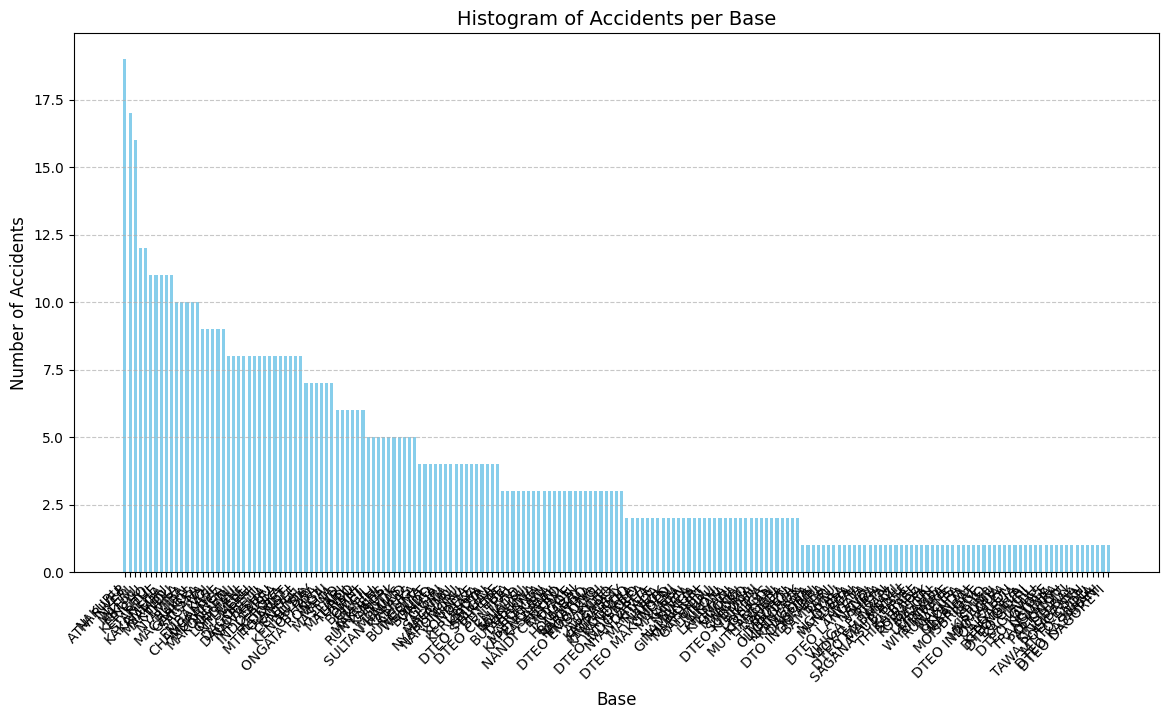

In [11]:
import matplotlib.pyplot as plt

# Sort bases by accident count for better visualization
base_accident_counts = base_accident_counts.sort_values(ascending=False)

# Increase figure size and adjust layout
plt.figure(figsize=(14, 7))

# Use a bar plot with better spacing
plt.bar(base_accident_counts.index, base_accident_counts.values, color='skyblue', width=0.6)

# Improve x-axis label readability
plt.xlabel("Base", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Histogram of Accidents per Base", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate labels for better spacing
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid for clarity

plt.show()



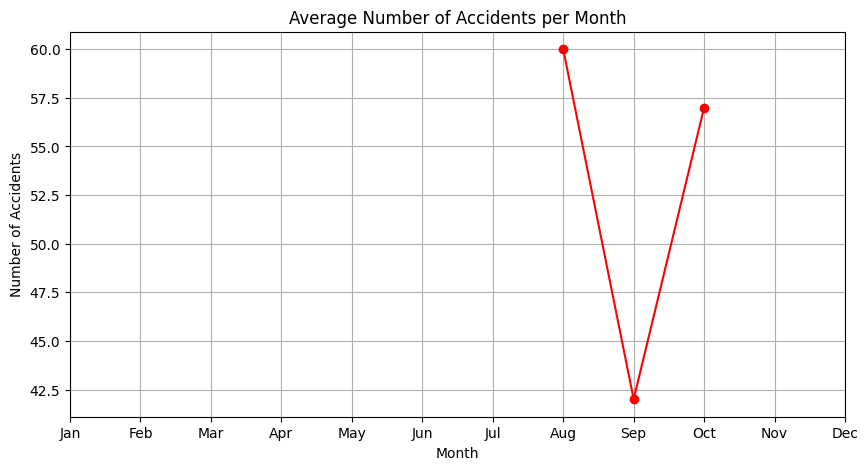

In [15]:
df['DATE DD/MM/YYYY'] = pd.to_datetime(df['DATE DD/MM/YYYY'], errors='coerce')
df['MONTH'] = df['DATE DD/MM/YYYY'].dt.month
monthly_accidents = df.groupby('MONTH').size()

plt.figure(figsize=(10,5))
plt.plot(monthly_accidents.index, monthly_accidents.values, marker='o', linestyle='-', color='red')
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("Average Number of Accidents per Month")
plt.grid()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


